In [30]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns 
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import nltk

In [3]:
with open('Leslie_all.pickle','rb') as read_file:
    leslie_episodes = pickle.load(read_file)

leslie_episodes.head()

,Character,Episode,Episode_Split,Episode_Text
0,Leslie Knope,s1e01,s1e01,"Hello. Hi. My name is Leslie Knope, and I work..."
1,Leslie Knope,s1e02,s1e02,"Well, one of the funner things that we do here..."
2,Leslie Knope,s1e03,s1e03,The Parks Department has so many programs. Jer...
3,Leslie Knope,s1e04,s1e04,"I don't believe it. Oh, my God. It's real. Hey..."
4,Leslie Knope,s1e05,s1e05,"In a town as old as Pawnee, there's a lot of h..."


In [55]:
all_leslie_text = leslie_episodes['Episode_Text']
comb = all_leslie_text.str.cat(sep = ' ')
comb[:1000]

'Hello. Hi. My name is Leslie Knope, and I work for the Parks and Recreation Department. Can I ask you a few questions? Would you say that you are, "Enjoying yourself and having fun, having a moderate amount of fun and somewhat enjoying yourself, or having no fun and no enjoyment?" I\'m gonna put a lot of fun. Sir, this is a children\'s slide. You\'re not allowed to sleep in here. You know, when I first tell people that I work in the government, they say, "Oh." "The government." "The government stinks." "The lines are too long at the DMV." But now things have changed. People need our help. And it feels good to be needed. Could you put your arms to your side? And that might help you slide down a little easier. Do you want to come this way? Okay, we\'re gonna need you to get out. Get out of the slide. Okay? Here we go! Okay, wake up. Here we go. Out of the slide. You know, government isn\'t just a boys\' club anymore. Women are everywhere. It\'s a great time to be a woman in politics. Hi

In [57]:
comb_lower = re.sub(r'[^\w\s]','',comb).lower()
comb_lower[:1000]

'hello hi my name is leslie knope and i work for the parks and recreation department can i ask you a few questions would you say that you are enjoying yourself and having fun having a moderate amount of fun and somewhat enjoying yourself or having no fun and no enjoyment im gonna put a lot of fun sir this is a childrens slide youre not allowed to sleep in here you know when i first tell people that i work in the government they say oh the government the government stinks the lines are too long at the dmv but now things have changed people need our help and it feels good to be needed could you put your arms to your side and that might help you slide down a little easier do you want to come this way okay were gonna need you to get out get out of the slide okay here we go okay wake up here we go out of the slide you know government isnt just a boys club anymore women are everywhere its a great time to be a woman in politics hillary clinton sarah palin me nancy pelosi we did it you know i 

In [40]:
from nltk.tokenize import word_tokenize
words = word_tokenize(comb_lower_no_punc)
words[:5]

['hello', 'hi', 'my', 'name', 'is']

In [46]:
stop_words = list(STOPWORDS)
stop_words[:10]

['has',
 'when',
 'his',
 "hadn't",
 'from',
 'here',
 "i'd",
 "when's",
 'during',
 'once']

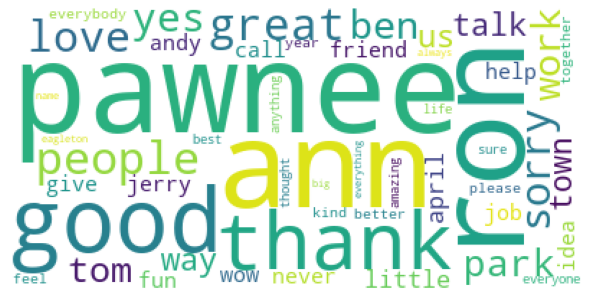

In [114]:
commonwords = ['okay', 'im', 'know', 'well', 'dont', 'youre', 'gonna', 'need', 'oh', 'one', 'think',
              'thats', 'want', 'go', 'yeah', 'going', 'let', 'will', 'now', 'hey', 'really', 'right',
              'look', 'god', 'say', 'hes', 'come', 'god', 'say', 'guy', 'much', 'thing', 'mean',
              'cant', 'theres', 'got', 'guys', 'put', 'ill', 'new', 'maybe', 'make', 'ive', 'theyre',
              'lets', 'take', 'something', 'back', 'see', 'tell', 'said', 'made', 'lot', 'shes', 
              'things', 'two', 'whats', 'day', 'even', 'didnt', 'first', 'every', 'leslie', 'knope',
              'keep', 'wait', 'wanted', 'time']
,
stop_words = list(STOPWORDS)
stopwords = set(stop_words + commonwords)

wc = WordCloud(background_color="white",
                    max_words=50,
                    stopwords=stopwords)

wc.generate(comb_lower)

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wc)
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [106]:
wc.words_

{'pawnee': 1.0,
 'ron': 0.9635258358662614,
 'ann': 0.939209726443769,
 'good': 0.9270516717325228,
 'thank': 0.8662613981762918,
 'people': 0.8145896656534954,
 'great': 0.7598784194528876,
 'love': 0.7173252279635258,
 'sorry': 0.6869300911854104,
 'yes': 0.6474164133738601,
 'work': 0.6048632218844985,
 'ben': 0.5957446808510638,
 'park': 0.5653495440729484,
 'tom': 0.541033434650456,
 'way': 0.48024316109422494,
 'us': 0.47720364741641336,
 'talk': 0.46808510638297873,
 'town': 0.44376899696048633,
 'little': 0.42857142857142855,
 'april': 0.42857142857142855,
 'jerry': 0.3890577507598784,
 'wow': 0.3708206686930091,
 'andy': 0.3586626139817629,
 'friend': 0.3556231003039514,
 'idea': 0.3525835866261398,
 'never': 0.3525835866261398,
 'job': 0.3525835866261398,
 'give': 0.3465045592705167,
 'call': 0.3434650455927052,
 'help': 0.3404255319148936,
 'fun': 0.3252279635258359,
 'everybody': 0.3252279635258359,
 'kind': 0.3221884498480243,
 'year': 0.3221884498480243,
 'feel': 0.316109